<a href="https://colab.research.google.com/github/hashmiabrar1/Deep-Learning-Hands-on/blob/main/AutoGrad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pytorch uses the Autograd library for backpropagation during training.
Training process finds the best values. Best value of w, b and lowest MSR(Mean squared error).
We start with some initial values then proceed to find the optimal values of w,b and msr using gradient descent. We find values of w1, b1 where loss has lowest gradient i.e zero. This is the use of back propagation i.e to tweak these params to optimal values.
Autograd is a core package for automatic differentiation- i.e remembers all executed operations in the forward phase and replays them in backward phase.

Autograd relies on reverse mode automatic differentiation.
Now building a simple NN model for regression and classification
NLL as loss function and LogSoftMax as output layer.

In [ ]:
import torch

In [ ]:
tensor=torch.Tensor([[3,4],
                     [7,5]])
tensor

tensor([[3., 4.],
        [7., 5.]])

In [ ]:
tensor.requires_grad

False

In [ ]:
#Enabling tracking for computations
tensor.requires_grad_()

tensor([[3., 4.],
        [7., 5.]], requires_grad=True)

In [ ]:
#As there is no backward pass, there is no gradient 
print(tensor.grad)
print(tensor.grad_fn)

None
None


In [ ]:
out=(tensor*tensor).mean()
#Out doesn't have a gradient, so we run the requires_grad function
out.requires_grad

True

In [ ]:
#But the tensor will have requires grad function to calculate gradient wrt out.
out.grad_fn

In [ ]:
#Original tensor won't have a gradient function as it isn't the result the of computation.
print(tensor.grad_fn)

None


In [ ]:
#Now we compute gradient wrt "out" tensor
out.backward()

In [ ]:
print(tensor.grad)

tensor([[1.5000, 2.0000],
        [3.5000, 2.5000]])


In [ ]:
print(tensor.requires_grad)
#Now since tensor has requires grad true, outputs having this input in computations will also have requires_grad as true.
op=tensor*tensor
print(op.requires_grad)

True
True


In [ ]:
#If u don't want to track the gradients based on i/p then use-
with torch.no_grad():
  op2=tensor*tensor
  print(op2.requires_grad)

False


Back propagation is implemented using a technique called reverse auto-differentiation. Gradients are basically differentiation of loss function wrt model parameters. Cannot do this for 10,000 neurons. So we use reverse auto-differentiation.
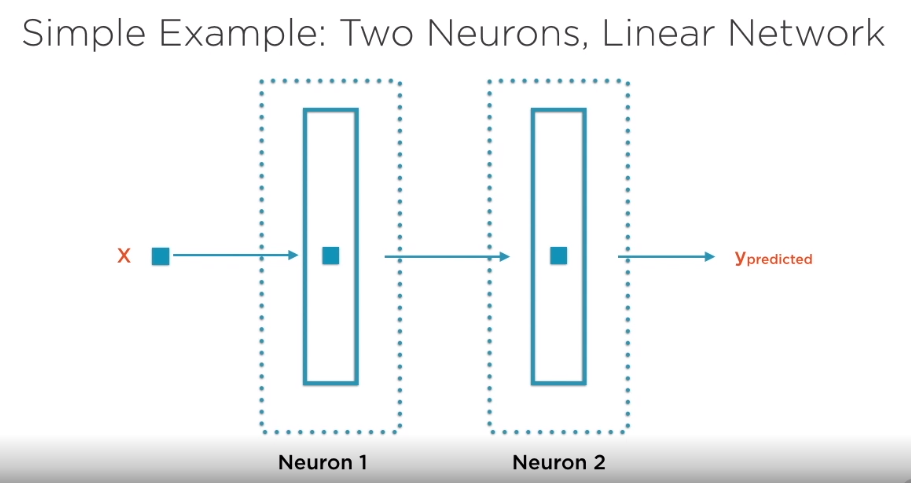


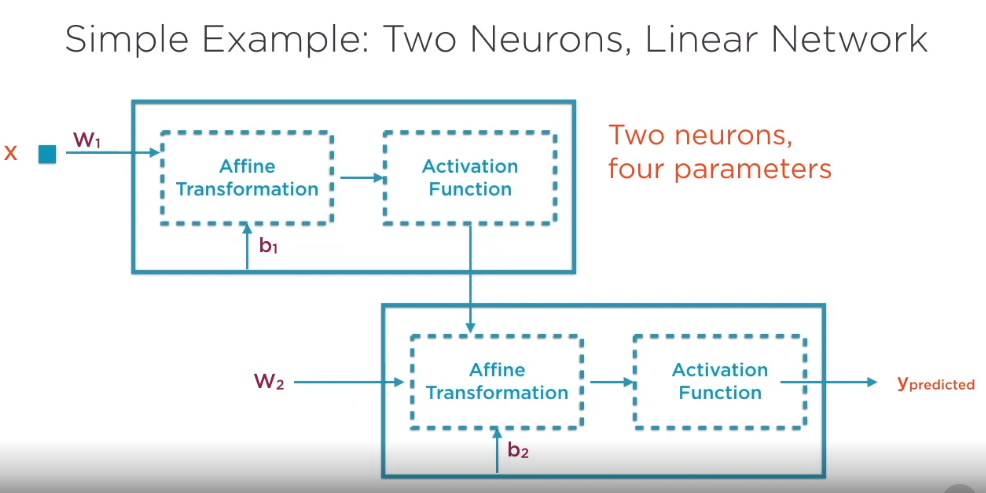

Objective above is to get the best parameters of w and b.

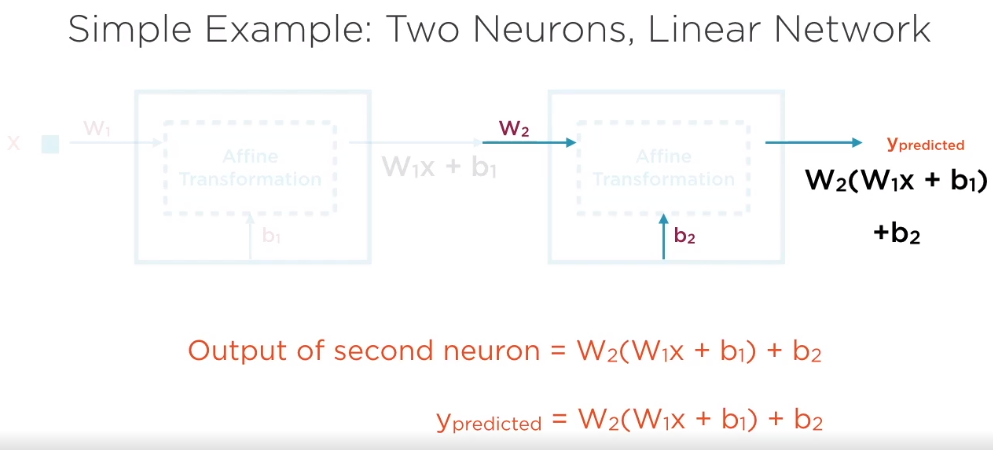

MSE= Mean squared error of Loss
Loss= theta= ypredicted- yactual

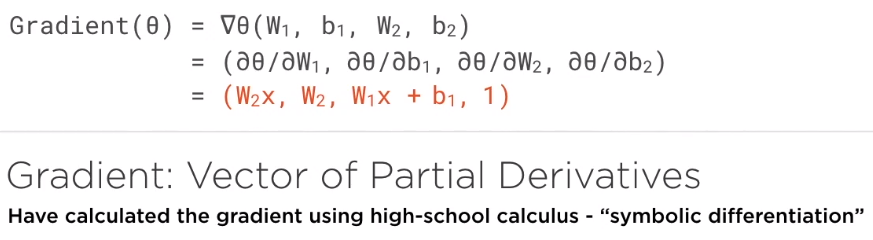

All this happens at one epoch at time t. Next we try to move the parameters towards the direction of reducing gradient to time t+1.
Learning rate indicates how long the steps we want to take towards learning.
This is all updated in backward pass at time t

![image.png](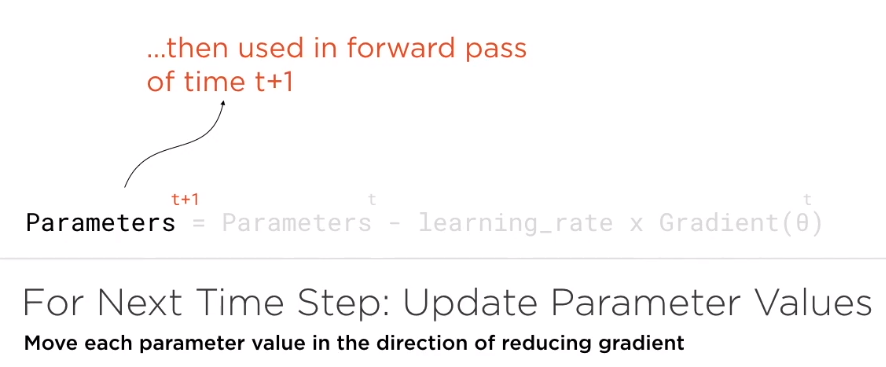
)

3 ways of calculating gradients-
1) Symbolic differentiation- Conceptually simple but hard to implement
2) Numeric differentiation- Easy to implement but won't scale up
3) Automatic differentiation- Conceptually difficult but easy to implement

3) Automatic differentiation is used. Based on taylor series expansion.
Used in reverse mode in TF, Pytorch.
There are two passes in each training step:-
1) Forward step- calculate loss
2) Backward step- update parameter values

Reverse auto-differentiation used called AutoGrad.
Backpropagation is done by invoking backward() method and only in training.

We can use softmax as our activation function for classification
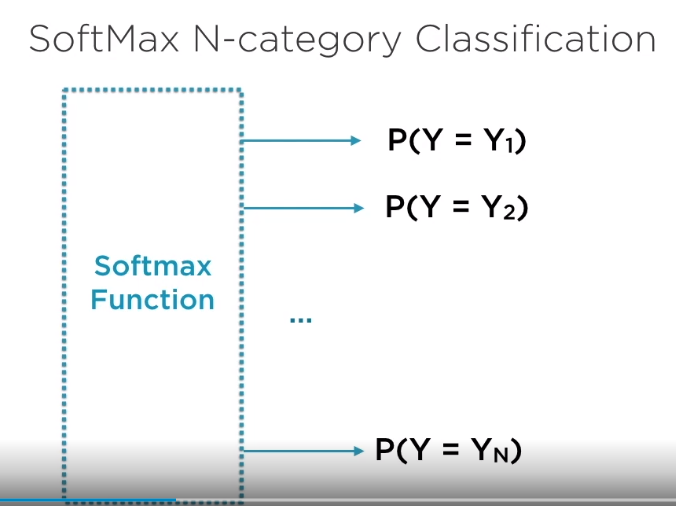

# Cross entropy is the measure of the difference between probabilities of measured and actual values.

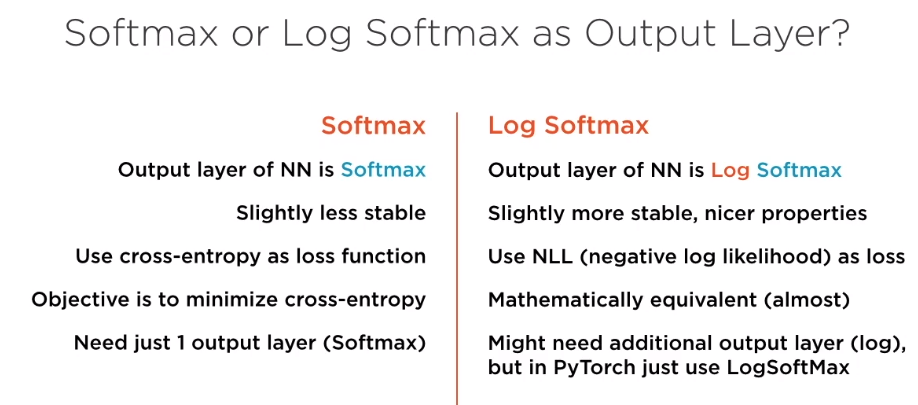

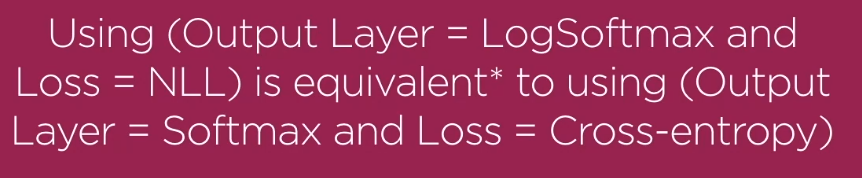